<a href="https://colab.research.google.com/github/nunososorio/bhs/blob/main/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações

In [ ]:
Instal....

# Download do dataset
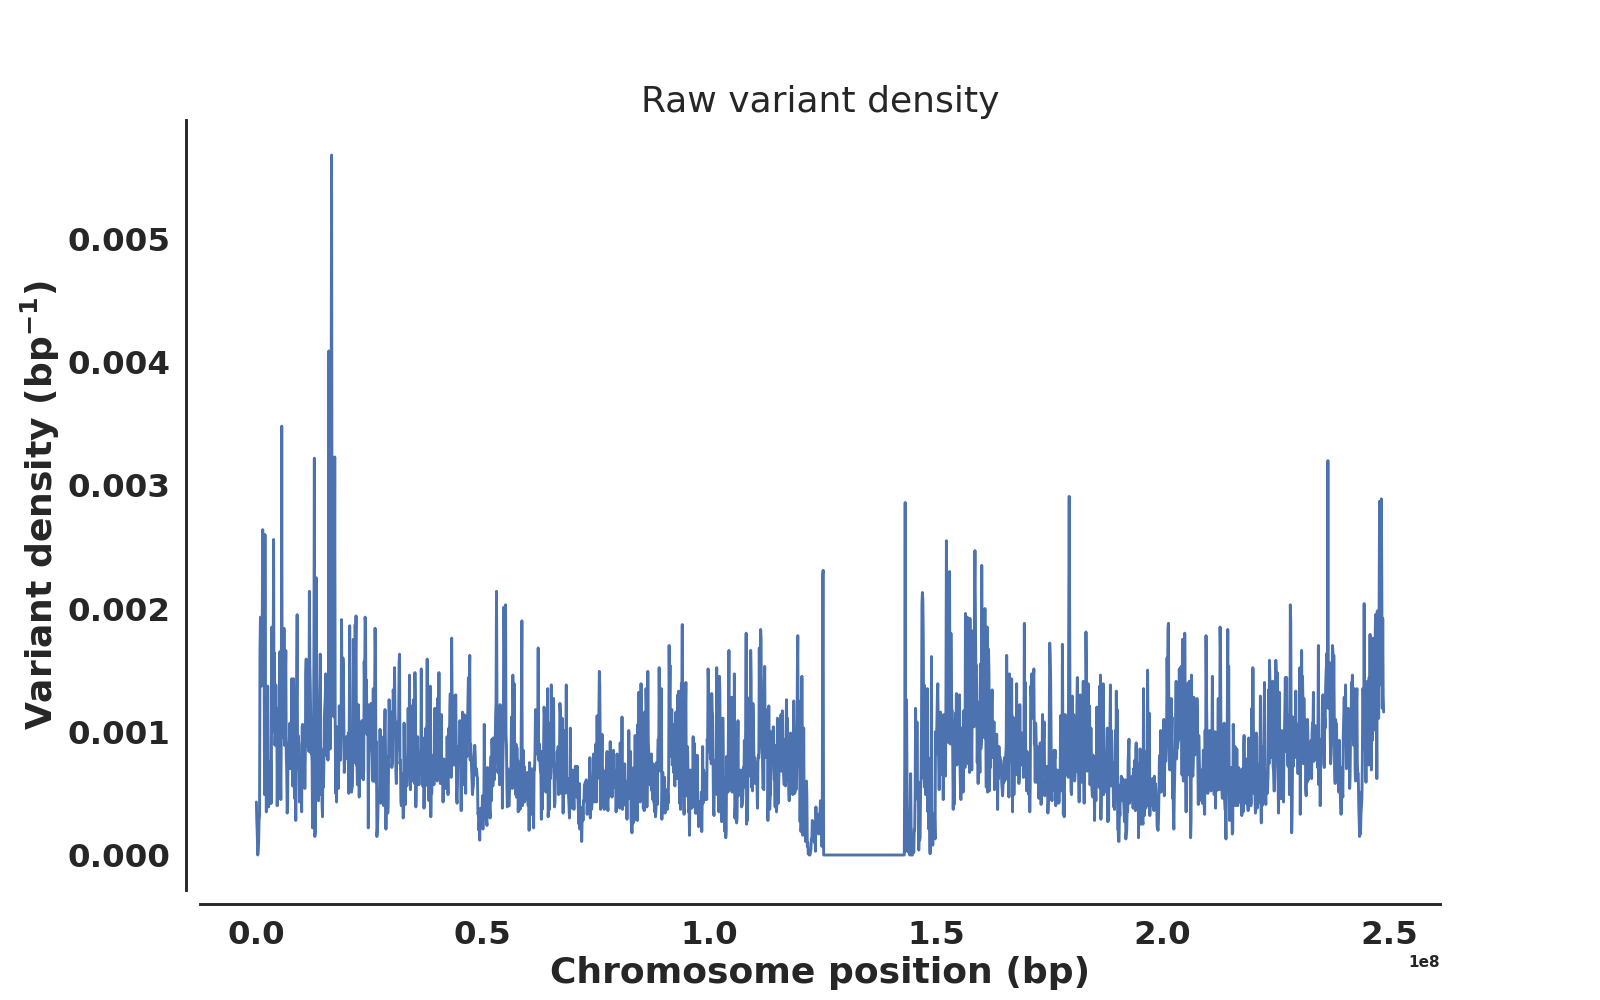

In [20]:
url <- "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE128nnn/GSE128661/suppl/GSE128661%5FWT%5FCtrl%5Fvs.%5FWT%5FAf%5F2h.xlsx"
destfile <- "data.xlsx"
download.file(url, destfile)

In [ ]:
install.packages("readxl")

In [ ]:
library(readxl)

In [21]:
data <- read_excel("data.xlsx")

# Exploração da matrix de contagens

In [22]:
data

Feature ID,Experiment - Range (original values),Experiment - IQR (original values),Experiment - Difference (original values),Experiment - Fold Change (original values),"EDGE test: WT Ctrl vs WT Af_2h, tagwise dispersions - P-value","EDGE test: WT Ctrl vs WT Af_2h, tagwise dispersions - Fold change","EDGE test: WT Ctrl vs WT Af_2h, tagwise dispersions - Weighted difference","EDGE test: WT Ctrl vs WT Af_2h, tagwise dispersions - FDR p-value correction",WT Ctrl - 17014-0001_S1_(GE) - Expression values,⋯,WT Af_2h - 17014-0009_S9_(GE) - Total exon-exon reads,WT Af_2h - 17014-0009_S9_(GE) - Unique intron reads,WT Af_2h - 17014-0009_S9_(GE) - Total intron reads,WT Af_2h - 17014-0009_S9_(GE) - Ratio of intron to total gene reads,WT Af_2h - 17014-0009_S9_(GE) - Exons,WT Af_2h - 17014-0009_S9_(GE) - RPKM,WT Af_2h - 17014-0009_S9_(GE) - Chromosome,WT Af_2h - 17014-0009_S9_(GE) - Chromosome region start,WT Af_2h - 17014-0009_S9_(GE) - Chromosome region end,WT Af_2h - Means
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
3.8-1.3,0,0,0.0000000,1.000000,1.000000000,1.000000,0.000000e+00,1.0000000,0,⋯,0,0,0,NA,0,0.000000e+00,chr6,29878011,29879177,0.000000e+00
3.8-1.4,0,0,0.0000000,1.000000,1.000000000,1.000000,0.000000e+00,1.0000000,0,⋯,0,0,0,NA,0,0.000000e+00,chr6,29833691,29834864,0.000000e+00
3.8-1.5,0,0,0.0000000,1.000000,1.000000000,1.000000,0.000000e+00,1.0000000,0,⋯,0,0,0,NA,0,0.000000e+00,chr6,29732892,29734073,0.000000e+00
5-HT3C2,0,0,0.0000000,1.000000,1.000000000,1.000000,0.000000e+00,1.0000000,0,⋯,0,0,0,NA,0,0.000000e+00,chr3,183794433,183802119,0.000000e+00
A1BG,120,29,29.6666667,1.390351,0.965931109,-1.010500,-5.785314e-08,1.0000000,77,⋯,31,74,103,0.38289963,11,2.343971e+00,chr19,58858171,58864865,1.056667e+02
A1BG-AS1,0,0,0.0000000,1.000000,1.000000000,1.000000,0.000000e+00,1.0000000,0,⋯,0,75,154,1.00000000,0,1.253702e+00,chr19,58863335,58866549,0.000000e+00
A1CF,1,0,0.0000000,-1.000000,1.000000000,-1.299993,-7.391001e-09,1.0000000,0,⋯,0,0,0,0.00000000,19,2.745821e-03,chr10,52559168,52645435,3.333333e-01
A2M,52476,9495,14807.0000000,1.603308,0.552001911,1.089459,1.602609e-04,1.0000000,27568,⋯,35048,183,193,0.00287802,36,3.760091e+02,chr12,9220303,9268558,3.935000e+04
A2M-AS1,0,0,0.0000000,1.000000,1.000000000,1.000000,0.000000e+00,1.0000000,0,⋯,0,15,15,1.00000000,0,1.363230e-01,chr12,9217772,9220651,0.000000e+00


In [ ]:
# manipulações
# Eliminar 3 primeiras linhas
# Encontrar NA ("missing values")
# Substituir NA por um número
# Apagar linhas com NA

# Visualização gráfica dos dados

In [13]:
library(readxl)

# Criar uma tabela de metadados

In [ ]:
# Create a column data frame with multiple samples per condition
colData <- DataFrame(condition = factor(c("control", "control", "treated", "treated")),
                     row.names = paste("Sample", 1:4))

# real metadata file

# DE analysis (DESeq2)

In [ ]:
# Load the DESeq2 library
library(DESeq2)

# Create a count matrix with multiple samples per condition
countData <- matrix(c(10, 10, 20, 20, 30, 30, 40, 40, 15, 15, 25, 25, 35, 35, 45, 45),
                    nrow = 4, ncol = 4,
                    dimnames = list(paste("Gene", 1:4), paste("Sample", 1:4)))

# Create a column data frame with multiple samples per condition
colData <- DataFrame(condition = factor(c("control", "control", "treated", "treated")),
                     row.names = paste("Sample", 1:4))

# Calculate size factors
dds <- estimateSizeFactors(dds)

# Use gene-wise estimates as final estimates
dds <- estimateDispersionsGeneEst(dds)
dispersions(dds) <- mcols(dds)$dispGeneEst

# Continue with testing
dds <- nbinomWaldTest(dds)

# Get the results
res <- results(dds)

# Print the results
print(res)


log2 fold change (MLE): condition treated vs control 
Wald test p-value: condition treated vs control 
DataFrame with 4 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat    pvalue      padj
       <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
Gene 1   20.0002      0.0463452  0.306042  0.151434  0.879633  0.879633
Gene 2   20.0002      0.0463452  0.306042  0.151434  0.879633  0.879633
Gene 3   30.9251     -0.0531905  0.253818 -0.209562  0.834010  0.879633
Gene 4   30.9251     -0.0531905  0.253818 -0.209562  0.834010  0.879633


## Vulcano plot

## Functional enrichment analysis